Experimento:
500 pessoas que não possuem animais de estimação assistem aos vídeos
de campanha de adoção. Os vídeos são idênticos com exceção dos animais
mostrados:

- 250 pessoas aleatorizadas para o vídeo com gato
- 250 pessoas aleatorizadas para o vídeo com cachorro

Objetivo: Avaliar qual animal (cachorro ou gato) deve estar
em um vídeo de campanha de adoção

Resposta:
"Qual a chance de adotar um pet? (0-100)" depois do vídeo?"
A média de probabilidade de quem vê o vídeo de gato é igual a de cachorro?


Considerar que:<br>
*As pessoas desse experimento só verão 1 vídeo cada;<br>
*Ao final do vídeo perguntamos a elas a probabilidade de que elas adotem um animal;<br>
*As amostras são aleatórias e sem viéses sistemáticos.



In [1]:
#carregando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#base de dados
df = pd.read_csv("https://raw.githubusercontent.com/JoiceO/python/master/estatistica-basico-avancado/02_cachorro_gato.csv")

In [4]:
df.head(5)
#na coluna 'grupo' temos que 0 é se a pessoa assistiu o vídeo com cachorro e 1 se o vídeo tinha um gato. 
#coluna 'escore' mostra a probabilidade da pessoa adotar o pet após assistir o vídeo

,Unnamed: 0,grupo,escore
0,0,1,59.853433
1,1,0,66.353529
2,2,1,56.495813
3,3,0,67.995090
4,4,1,70.434375


In [6]:
#dados estatítiscos sobre as 2 variáveis da coluna 'grupo'
df.groupby('grupo').describe()

#Olhando pela média, a probabilidade de ser adotar um pet depois de assistir um vídeo com gato é maior

Unnamed: 0                                                           \
           count        mean         std  min    25%    50%    75%    max   
grupo                                                                       
0          253.0  247.470356  147.772334  1.0  117.0  256.0  366.0  499.0   
1          247.0  251.578947  141.301675  0.0  131.5  240.0  377.5  497.0   

      escore                                                         \
       count       mean        std        min        25%        50%   
grupo                                                                 
0      253.0  55.531922  14.665402  16.304739  44.488055  55.802372   
1      247.0  56.744495  14.913287  14.654955  48.682432  56.924405   

                             
             75%        max  
grupo                        
0      66.249013  95.309459  
1      66.817326  93.259671

#Histograma das 2 variáveis



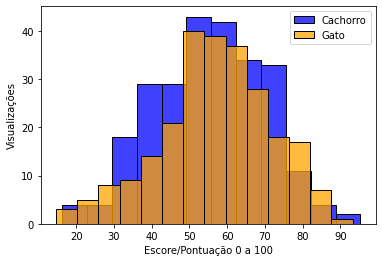

In [15]:
sns.histplot(df[df['grupo'] == 0]['escore'], label = 'Cachorro', color="blue")  #histograma do grupo que viu o vídeo de cachorro
sns.histplot(df[df['grupo'] == 1]['escore'], label = 'Gato', color = "orange") #histograma do grupo que viu o vídeo de gato
plt.xlabel('Escore/Pontuação 0 a 100')
plt.ylabel('Visualizações')
plt.legend()
plt.show()

Dados demonstram seguir a normal. Com o teste de hipótese podemos ver com mais detalhe qual grupo tem média maior.

O teste de hipótese escolhido deve ser para média, com 2 amostras independentes (quem viu vídeo de cachorro só viu cachorro e quem viu video de gato só viu de gato).
Como não temos o desvio-padrão da população, podemos usar o teste t

# Comparação entre os grupos por teste-t independente

In [12]:
#função que realiza o teste-t para amostras independentes
from scipy.stats import ttest_ind

In [16]:
# a função retorna uma tupla. O primeiro valor é o valor do t e o segundo é o p-value
ttest_ind(df[df['grupo'] == 0]['escore'], df[df['grupo'] == 1]['escore']) #0 é cachorro e 1 é gato

Ttest_indResult(statistic=-0.9166663411409343, pvalue=0.35976119585131083)

In [19]:
#organizando a tupla para denominar cada um dos valores
t, pvalue = ttest_ind(df[df['grupo'] == 0]['escore'], df[df['grupo'] == 1]['escore'])
print('stat=%.3f, p=%.3f' % (t, pvalue))

stat=-0.917, p=0.360


Estabelecendo o nível de significância como 5%, como p > 0,05, podemos aceitar a hipótese nula. Logo, estatatisticamente as médias são iguais
